# Rysowanie do PDF

In [1]:
import numpy as np
import pandas as pd
from reportlab.pdfgen import canvas
import copy
from tqdm import tqdm
import matplotlib.pyplot as plt

from puzzle_class import puzzle
from pdf_printing_functions import draw_on_canvas

### Wylosuj i wydrukuj zagadkę

# Nowe

In [2]:
puzzle1 = puzzle(4,4)
seed = 123#random.randint(100,100000)
puzzle1.generate(seed, trace=True)
puzzle1.print_info()

Generating puzzle for seed=123
Drawing categories...
Categories drawn:
('categorical', ['Tomasz', 'Stanisław', 'Grzegorz', 'Ireneusz'])
('categorical', ['fabularny', 'biograficzny', 'film noir', 'przyrodniczy'])
('numerical', [20.0, 40.0, 60.0, 80.0], {'x=y*2', 'x=y+40.0', 'x=y+20.0'}, '@ okruszków')
('numerical', [2.0, 6.0, 18.0, 54.0], {'x=y*3', 'x=y*9'}, '@ ludzi')
Drawing clues...
No of clues drawn = 23[16, 0, 0, 3, 1, 3]
Restricting clues...
Restricting clue 1/23, type: 1 OUT
Restricting clue 2/23, type: 1 OUT
Restricting clue 3/23, type: 1 OUT
Restricting clue 4/23, type: 1 OUT
Restricting clue 5/23, type: 1 OUT
Restricting clue 6/23, type: 1 OUT
Restricting clue 7/23, type: 1
Restricting clue 8/23, type: 1 OUT
Restricting clue 9/23, type: 1 OUT
Restricting clue 10/23, type: 1
Restricting clue 11/23, type: 1 OUT
Restricting clue 12/23, type: 1
Restricting clue 13/23, type: 1
Restricting clue 14/23, type: 1 OUT
Restricting clue 15/23, type: 1
Restricting clue 16/23, type: 1 OUT
Re

In [3]:
c = canvas.Canvas("test4.pdf")
#c = canvas.Canvas("./pokazowe/testy_przed_zmiana_generowania/v3/p"+str(puzzle1.seed)+"K"+str(puzzle1.K)+"k"+str(puzzle1.k)+"c"+str(len(puzzle1.clues))+".pdf")

draw_on_canvas(puzzle1, c)
c.showPage()
c.save()

# Pętla do statystyk

In [3]:
df = pd.DataFrame(columns=["seed","cat_cat","cat_num","cat_ord","Nclues_post", \
                           "N1","N2","N3","N4","N5","N6", "diff_post"])

for seed in tqdm(range(100)):
    puzzle1 = puzzle(4,5)
    seed = random.randint(100,100000)
    puzzle1.generate(seed, trace=False)
    
    cat_cat = len([c for c in puzzle1.cathegories if c[0]=='cathegorical'])
    cat_num = len([c for c in puzzle1.cathegories if c[0]=='numerical'])
    cat_ord = len([c for c in puzzle1.cathegories if c[0]=='ordinal'])
    
    Nclues_post = len([c for c in puzzle1.clues])
    Nclues_1 = len([c for c in puzzle1.clues if c["typ"]==1])
    Nclues_2 = len([c for c in puzzle1.clues if c["typ"]==2])
    Nclues_3 = len([c for c in puzzle1.clues if c["typ"]==3])
    Nclues_4 = len([c for c in puzzle1.clues if c["typ"]==4])
    Nclues_5 = len([c for c in puzzle1.clues if c["typ"]==5])
    Nclues_6 = len([c for c in puzzle1.clues if c["typ"]==6])
    
    diff_post = puzzle1.diff
    print(diff_post)
    
    df.loc[seed,:] = [seed,cat_cat,cat_num,cat_ord,Nclues_post, \
                 Nclues_1,Nclues_2,Nclues_3,Nclues_4,Nclues_5,Nclues_6,diff_post]

  1%|          | 1/100 [01:19<2:10:40, 79.20s/it]

3.4


  2%|▏         | 2/100 [02:37<2:08:52, 78.90s/it]

2.0


  3%|▎         | 3/100 [03:21<1:50:43, 68.48s/it]

4.8


  4%|▍         | 4/100 [04:34<1:51:49, 69.89s/it]

12.0


  5%|▌         | 5/100 [05:18<1:38:03, 61.93s/it]

1.8


  6%|▌         | 6/100 [05:59<1:27:29, 55.85s/it]

2.6


  7%|▋         | 7/100 [06:32<1:15:44, 48.86s/it]

2.0


  8%|▊         | 8/100 [07:46<1:26:37, 56.50s/it]

8.6


  9%|▉         | 9/100 [08:53<1:30:13, 59.49s/it]

5.0


 10%|█         | 10/100 [09:55<1:30:31, 60.35s/it]

6.8


 11%|█         | 11/100 [10:36<1:21:08, 54.70s/it]

5.0


 12%|█▏        | 12/100 [10:57<1:05:00, 44.33s/it]

1.0


 13%|█▎        | 13/100 [11:46<1:06:27, 45.83s/it]

2.4


 14%|█▍        | 14/100 [12:30<1:05:03, 45.39s/it]

3.6


 15%|█▌        | 15/100 [13:21<1:06:42, 47.09s/it]

1.0


 16%|█▌        | 16/100 [14:00<1:02:28, 44.62s/it]

1.0


 17%|█▋        | 17/100 [15:00<1:07:58, 49.14s/it]

7.0


 18%|█▊        | 18/100 [15:40<1:03:33, 46.51s/it]

2.0


 19%|█▉        | 19/100 [16:27<1:02:44, 46.47s/it]

6.6


 20%|██        | 20/100 [17:01<56:59, 42.74s/it]  

4.2


 21%|██        | 21/100 [17:41<55:22, 42.06s/it]

4.4


 22%|██▏       | 22/100 [18:22<54:16, 41.75s/it]

4.8


 23%|██▎       | 23/100 [19:33<1:04:57, 50.61s/it]

7.0


 24%|██▍       | 24/100 [20:38<1:09:17, 54.70s/it]

2.4


 25%|██▌       | 25/100 [21:09<59:25, 47.54s/it]  

1.6


 26%|██▌       | 26/100 [22:06<1:02:24, 50.60s/it]

2.2


 27%|██▋       | 27/100 [23:14<1:07:41, 55.64s/it]

8.4


 28%|██▊       | 28/100 [23:52<1:00:21, 50.30s/it]

2.0


 29%|██▉       | 29/100 [24:38<58:00, 49.03s/it]  

2.0


 30%|███       | 30/100 [25:45<1:03:40, 54.58s/it]

5.0


 31%|███       | 31/100 [26:21<56:17, 48.95s/it]  

1.0


 32%|███▏      | 32/100 [27:23<1:00:03, 53.00s/it]

4.6


 33%|███▎      | 33/100 [28:33<1:04:53, 58.11s/it]

12.6


 34%|███▍      | 34/100 [29:49<1:09:44, 63.41s/it]

14.2


 35%|███▌      | 35/100 [30:54<1:09:04, 63.75s/it]

6.8


 36%|███▌      | 36/100 [32:16<1:13:56, 69.33s/it]

19.0


 37%|███▋      | 37/100 [32:50<1:01:38, 58.70s/it]

2.2


 38%|███▊      | 38/100 [33:26<53:33, 51.83s/it]  

2.2


 39%|███▉      | 39/100 [34:27<55:34, 54.66s/it]

6.2


 40%|████      | 40/100 [35:21<54:21, 54.36s/it]

4.8


 41%|████      | 41/100 [36:14<53:15, 54.17s/it]

3.8


 42%|████▏     | 42/100 [36:53<47:51, 49.51s/it]

8.0


 43%|████▎     | 43/100 [37:30<43:21, 45.64s/it]

2.8


 44%|████▍     | 44/100 [37:56<37:18, 39.97s/it]

2.0


 45%|████▌     | 45/100 [38:44<38:36, 42.13s/it]

1.0


 46%|████▌     | 46/100 [39:44<42:54, 47.68s/it]

4.4


 47%|████▋     | 47/100 [40:47<46:06, 52.19s/it]

5.2


 48%|████▊     | 48/100 [41:13<38:23, 44.30s/it]

2.4


 49%|████▉     | 49/100 [41:50<35:52, 42.20s/it]

1.4


 50%|█████     | 50/100 [42:21<32:15, 38.72s/it]

1.8


 51%|█████     | 51/100 [43:44<42:30, 52.06s/it]

11.4


 52%|█████▏    | 52/100 [44:21<38:05, 47.62s/it]

1.0


 53%|█████▎    | 53/100 [44:47<32:05, 40.97s/it]

2.4


 54%|█████▍    | 54/100 [45:21<29:52, 38.98s/it]

1.0


 55%|█████▌    | 55/100 [46:06<30:29, 40.65s/it]

2.0


 56%|█████▌    | 56/100 [46:39<28:10, 38.43s/it]

3.4


 57%|█████▋    | 57/100 [47:06<25:08, 35.08s/it]

3.0


 58%|█████▊    | 58/100 [47:57<27:56, 39.91s/it]

6.6


 59%|█████▉    | 59/100 [49:14<34:48, 50.94s/it]

4.0


 60%|██████    | 60/100 [50:24<37:48, 56.72s/it]

10.2


 61%|██████    | 61/100 [51:02<33:08, 50.98s/it]

2.0


 62%|██████▏   | 62/100 [51:50<31:44, 50.11s/it]

1.0


 63%|██████▎   | 63/100 [52:52<33:10, 53.80s/it]

13.0


 64%|██████▍   | 64/100 [53:43<31:49, 53.04s/it]

1.8


 65%|██████▌   | 65/100 [55:07<36:21, 62.34s/it]

13.0


 66%|██████▌   | 66/100 [55:53<32:26, 57.25s/it]

4.8


 67%|██████▋   | 67/100 [56:51<31:42, 57.66s/it]

11.2


 68%|██████▊   | 68/100 [57:24<26:43, 50.10s/it]

2.0


 69%|██████▉   | 69/100 [58:25<27:33, 53.35s/it]

7.4


 70%|███████   | 70/100 [58:55<23:15, 46.51s/it]

1.0


 71%|███████   | 71/100 [59:44<22:49, 47.22s/it]

2.0


 72%|███████▏  | 72/100 [1:00:39<23:05, 49.47s/it]

7.2


 73%|███████▎  | 73/100 [1:01:41<23:56, 53.22s/it]

6.4


 74%|███████▍  | 74/100 [1:02:53<25:26, 58.73s/it]

6.4


 75%|███████▌  | 75/100 [1:03:46<23:46, 57.04s/it]

2.2


 76%|███████▌  | 76/100 [1:05:03<25:13, 63.05s/it]

2.0


 77%|███████▋  | 77/100 [1:05:49<22:15, 58.08s/it]

3.0


 78%|███████▊  | 78/100 [1:06:26<19:00, 51.84s/it]

6.8


 79%|███████▉  | 79/100 [1:06:56<15:50, 45.28s/it]

2.2


 80%|████████  | 80/100 [1:07:51<15:59, 47.96s/it]

6.8


 81%|████████  | 81/100 [1:08:50<16:17, 51.45s/it]

6.0


 82%|████████▏ | 82/100 [1:09:38<15:03, 50.21s/it]

4.6


 83%|████████▎ | 83/100 [1:10:21<13:38, 48.14s/it]

1.0


 84%|████████▍ | 84/100 [1:11:10<12:55, 48.47s/it]

2.0


 85%|████████▌ | 85/100 [1:12:03<12:25, 49.71s/it]

1.8


 86%|████████▌ | 86/100 [1:12:58<11:59, 51.41s/it]

4.8


 87%|████████▋ | 87/100 [1:13:36<10:16, 47.45s/it]

1.6


 88%|████████▊ | 88/100 [1:14:50<11:03, 55.25s/it]

12.6


 89%|████████▉ | 89/100 [1:16:38<13:01, 71.06s/it]

17.0


 90%|█████████ | 90/100 [1:17:09<09:51, 59.16s/it]

1.0


 91%|█████████ | 91/100 [1:17:54<08:13, 54.88s/it]

2.4


 92%|█████████▏| 92/100 [1:18:56<07:36, 57.05s/it]

12.6


 93%|█████████▎| 93/100 [1:20:06<07:06, 60.90s/it]

8.0


 94%|█████████▍| 94/100 [1:21:40<07:04, 70.78s/it]

5.2


 95%|█████████▌| 95/100 [1:22:20<05:07, 61.52s/it]

8.0


 96%|█████████▌| 96/100 [1:23:18<04:02, 60.62s/it]

3.8


 97%|█████████▋| 97/100 [1:24:08<02:52, 57.40s/it]

1.0


 98%|█████████▊| 98/100 [1:24:38<01:38, 49.05s/it]

1.8


 99%|█████████▉| 99/100 [1:25:39<00:52, 52.69s/it]

17.0


100%|██████████| 100/100 [1:26:40<00:00, 52.00s/it]

11.6


In [4]:
df.to_csv("stats2_K4k5.csv", header=True, index=False)

In [5]:
df = pd.read_csv("stats2_K4k5.csv")
df.head()

,seed,cat_cat,cat_num,cat_ord,Nclues_post,N1,N2,N3,N4,N5,N6,diff_post
0,78438,2,1,1,12,4,0,0,2,2,4,3.4
1,35620,2,2,0,14,7,0,2,1,1,3,2.0
2,41222,3,1,0,11,4,1,2,1,1,2,4.8
3,28729,2,2,0,12,5,0,3,1,0,3,12.0
4,36314,3,1,0,10,3,1,3,0,2,1,1.8


In [11]:
np.min(df.diff_post)

1.0

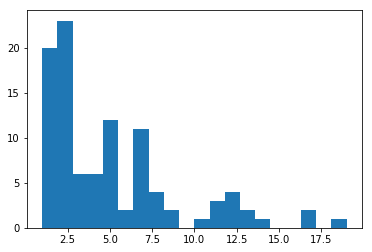

In [13]:
plt.hist(df.diff_post, bins=20)
plt.show()

In [15]:
df.loc[:,["N1","N2","N3","N4","N5","N6"]].sum()

N1    323
N2    122
N3    138
N4    162
N5    130
N6    140
dtype: int64

In [16]:
df.sort_values("diff_post", ascending=False).head()

,seed,cat_cat,cat_num,cat_ord,Nclues_post,N1,N2,N3,N4,N5,N6,diff_post
35,87654,1,3,0,9,2,2,1,0,1,3,19.0
98,99227,2,1,1,8,2,2,0,1,2,1,17.0
88,70248,2,2,0,12,4,1,3,0,3,1,17.0
33,89951,1,2,1,12,4,2,2,0,2,2,14.2
64,90538,2,2,0,14,7,0,1,2,2,2,13.0


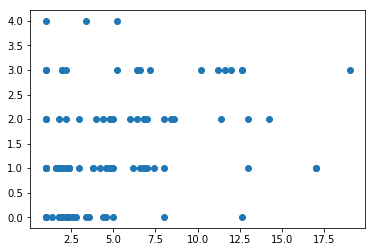

In [17]:
plt.scatter(df.diff_post, df.N6)
plt.show()

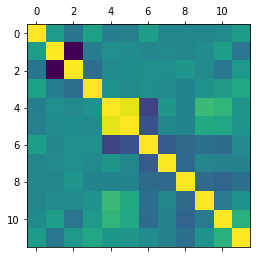

In [18]:
plt.matshow(df.corr())
plt.show()

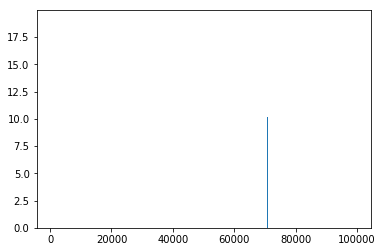

In [19]:
import matplotlib.pyplot as plt
plt.bar(df.seed, df.diff_post)
plt.show()

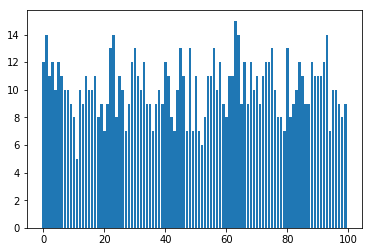

In [21]:
plt.bar(df.index, df.Nclues_post)
plt.show()

# Testy

# Śmietnik

In [2]:
correct = 0
N = 100
for i in range(N):
    seed = random.randint(100,100000)
    puzzle1 = puzzle(4,5)
    puzzle1.set_seed(seed)
    puzzle1.draw_cathegories(diff=3)
    puzzle1.draw_clues()
    if puzzle1.is_grid_completed() and not puzzle1.is_grid_contradictory():
        correct += 1

#print(puzzle1.is_grid_completed(), puzzle1.is_grid_contradictory())

Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
Puzzle is contradictory with clue 2!
P

Exception: Nie udało się znaleźć wystarczającej liczby interpretacji dla zmiennych numerycznych!

In [90]:
seed = random.randint(100,100000)
puzzle1 = puzzle(3,6)
puzzle1.set_seed(seed)
puzzle1.draw_cathegories(diff=3)
puzzle1.draw_clues()

print(puzzle1.is_grid_completed(), puzzle1.is_grid_contradictory())
print(len(puzzle1.clues))
puzzle1.try_to_restrict_clues()      
print(len(puzzle1.clues))
puzzle1.try_to_solve()        
if puzzle1.is_grid_contradictory():
    print("Wyszło sprzeczne!")
else:
    c = canvas.Canvas("p"+str(puzzle1.seed)+"K"+str(puzzle1.K)+"k"+str(puzzle1.k)+"c"+str(len(puzzle1.clues))+".pdf")
    rysuj_zagadke(puzzle1, c)
    c.showPage()
    c.save()

True False
10
[]
10


# Inne

In [67]:
def fonts(canvas):
    from reportlab.lib.units import inch
    for font in canvas.getAvailableFonts():
        print(font)
fonts(c)

Courier
Courier-Bold
Courier-BoldOblique
Courier-Oblique
Helvetica
Helvetica-Bold
Helvetica-BoldOblique
Helvetica-Oblique
Symbol
Times-Bold
Times-BoldItalic
Times-Italic
Times-Roman
ZapfDingbats
sans-serif
